In [58]:
import os
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

In [59]:
df = pd.read_csv("Cancer_Data.csv")
df = df.drop(['Unnamed: 32', "id"], axis=1, inplace=False)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [60]:
Y = df.pop("diagnosis")
X = df
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Logistic Modeling

In [61]:
def trainLogistic(show_feature_importance=False):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

    # Create a logistic regression model
    model = LogisticRegression(max_iter=10000)

    # Train the model
    model.fit(X_train, y_train)

    # Test the model
    y_pred = model.predict(X_test)

    if show_feature_importance:
        # get importance
        importance = model.coef_[0]
        # summarize feature importance
        for i,v in zip(importance, X.columns):
            print(f'Feature: {v}, Weight: {i}')
        # plot feature importance
        plt.bar([x for x in range(len(importance))], importance)
        plt.show()

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [62]:
accuracy = [trainLogistic() for _ in range(100)]
print("Average Accuracy Logistic: ", sum(accuracy)/len(accuracy))

Average Accuracy Logistic:  0.949122807017543


Feature: radius_mean, Weight: -0.7690455138345595
Feature: texture_mean, Weight: -0.13510401166041383
Feature: perimeter_mean, Weight: 0.3554511997423936
Feature: area_mean, Weight: -0.030317442034740065
Feature: smoothness_mean, Weight: 0.1532741584953841
Feature: compactness_mean, Weight: 0.16023932356951126
Feature: concavity_mean, Weight: 0.45885524142273704
Feature: concave points_mean, Weight: 0.2546893302385218
Feature: symmetry_mean, Weight: 0.2949625288945123
Feature: fractal_dimension_mean, Weight: 0.02071443194175998
Feature: radius_se, Weight: 0.08172474713000893
Feature: texture_se, Weight: -1.207727242794613
Feature: perimeter_se, Weight: 0.027258574721970352
Feature: area_se, Weight: 0.09339909587359564
Feature: smoothness_se, Weight: 0.024309488815143408
Feature: compactness_se, Weight: -0.07028851223119288
Feature: concavity_se, Weight: 0.020002168821254735
Feature: concave points_se, Weight: 0.036366141626200554
Feature: symmetry_se, Weight: 0.03817386392384429
Featur

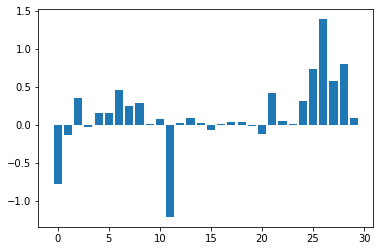

0.9649122807017544

In [63]:
trainLogistic(show_feature_importance=True)

# Decision Tree

In [64]:
def decisionTree(show_feature_importance=False):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

    # Create a logistic regression model
    model = DecisionTreeClassifier()

    # Train the model
    model.fit(X_train, y_train)

    # Test the model
    y_pred = model.predict(X_test)

    if show_feature_importance:
        # get importance
        importance = model.feature_importances_

        results = zip(importance, X.columns)
        results = sorted(results, key=lambda x: x[0], reverse=True)
        # summarize feature importance
        for i,v in results:
            print(f'Feature: {v}, Weight: {i}')
        # plot feature importance
        plt.bar([x for x in range(len(importance))], importance)
        plt.show()

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [65]:
accuracy = [decisionTree() for _ in range(100)]
print("Average Accuracy Decision Tree: ", sum(accuracy)/len(accuracy))

Average Accuracy Decision Tree:  0.9314912280701744


# Random Forests

In [66]:
def trainRandomForest(X, Y, show_feature_importance=False):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

    # Create a logistic regression model
    model = RandomForestClassifier()

    # Train the model
    model.fit(X_train, y_train)

    # Test the model
    y_pred = model.predict(X_test)

    if show_feature_importance:
        # get importance
        importance = model.feature_importances_
        # summarize feature importance
        for i,v in zip(importance, X.columns):
            print(f'Feature: {v}, Weight: {i}')
        # plot feature importance
        plt.bar([x for x in range(len(importance))], importance)
        plt.show()

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [67]:
accuracy = [trainRandomForest(X, Y) for _ in range(100)]
print("Average Accuracy Logistic: ", sum(accuracy)/len(accuracy))

Average Accuracy Logistic:  0.9584210526315781


Feature: radius_mean, Weight: 0.014095162886172933
Feature: texture_mean, Weight: 0.012342559515218532
Feature: perimeter_mean, Weight: 0.048588266078333525
Feature: area_mean, Weight: 0.060754158219963814
Feature: smoothness_mean, Weight: 0.006141788890490705
Feature: compactness_mean, Weight: 0.016841208029624292
Feature: concavity_mean, Weight: 0.04868994527474928
Feature: concave points_mean, Weight: 0.13215813812257413
Feature: symmetry_mean, Weight: 0.005167086002870829
Feature: fractal_dimension_mean, Weight: 0.004509542707563597
Feature: radius_se, Weight: 0.019009790141500008
Feature: texture_se, Weight: 0.003223018990161046
Feature: perimeter_se, Weight: 0.009819846272734025
Feature: area_se, Weight: 0.03347544942280039
Feature: smoothness_se, Weight: 0.005313748580156752
Feature: compactness_se, Weight: 0.004859221598031563
Feature: concavity_se, Weight: 0.004996363139487519
Feature: concave points_se, Weight: 0.005446200355181475
Feature: symmetry_se, Weight: 0.005412666764

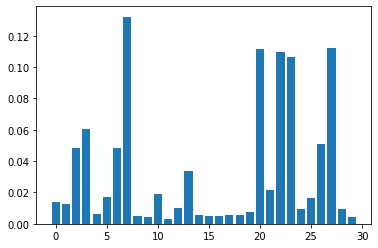

0.9736842105263158

In [69]:
trainRandomForest(X, Y, show_feature_importance=True)

In [70]:
def trainRandomImportantFeatures(X, Y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

    # Create a logistic regression model
    model = RandomForestClassifier()

    # Train the model
    model.fit(X_train, y_train)

    return model.feature_importances_

Feature: perimeter_worst, Weight: 0.129301247684169
Feature: concave points_worst, Weight: 0.12056948660361998
Feature: radius_worst, Weight: 0.1138261548326847
Feature: area_worst, Weight: 0.11172548509284466
Feature: concave points_mean, Weight: 0.1018976434366757
Feature: perimeter_mean, Weight: 0.051381038913745104
Feature: concavity_mean, Weight: 0.05064863546991979
Feature: area_mean, Weight: 0.046491339685880595
Feature: radius_mean, Weight: 0.0405264382057443
Feature: area_se, Weight: 0.03600633042840439
Feature: concavity_worst, Weight: 0.03547022833913987
Feature: texture_worst, Weight: 0.0178805511406626
Feature: compactness_worst, Weight: 0.015396841165932696
Feature: radius_se, Weight: 0.01412451403767086
Feature: texture_mean, Weight: 0.013910112824720327
Feature: smoothness_worst, Weight: 0.01286338952187487
Feature: perimeter_se, Weight: 0.012352301665114451
Feature: compactness_mean, Weight: 0.011939869338818028
Feature: symmetry_worst, Weight: 0.010132838746120011
Fea

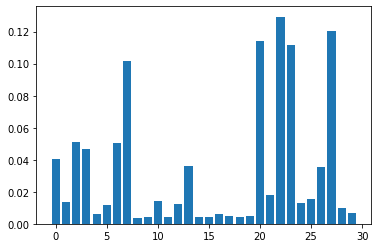

In [71]:
weights = [trainRandomImportantFeatures(X, Y) for _ in range(100)]
weights = np.array(weights)
weights = weights.mean(axis=0)
results = zip(weights, X.columns)
results = sorted(results, key=lambda x: x[0], reverse=True)

for i,v in results:
    print(f'Feature: {v}, Weight: {i}')
# plot feature importance
plt.bar([x for x in range(len(weights))], weights)
plt.show()

# Using the most important features to predict type of tumor

In [73]:
weights = [trainRandomImportantFeatures(X, Y) for _ in range(100)]
weights = np.array(weights)
weights = weights.mean(axis=0)
average_weights = weights.mean(axis=0)
results = zip(weights, X.columns)
important_features = [v for i,v in results if i > average_weights]

print(important_features)

['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst', 'concavity_worst', 'concave points_worst']


In [74]:
filtered_X = pd.read_csv('Cancer_Data.csv', usecols=important_features)
filtered_Y = pd.read_csv('Cancer_Data.csv', usecols=["diagnosis"])

In [75]:
accuracy = [trainRandomForest(filtered_X, filtered_Y) for _ in range(100)]
print("Average Accuracy Random Forest (using best features): ", sum(accuracy)/len(accuracy))

accuracy = [trainRandomForest(X, Y) for _ in range(100)]
print("Average Accuracy Random Forest (using all features): ", sum(accuracy)/len(accuracy))


<ipython-input-66-9eab41a0854f>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
<ipython-input-66-9eab41a0854f>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
<ipython-input-66-9eab41a0854f>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
<ipython-input-66-9eab41a0854f>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
<ipython-input-66-9eab41a0854f>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

Average Accuracy Random Forest (using best features):  0.9454385964912271
Average Accuracy Random Forest (using all features):  0.9616666666666659
